In [117]:
# Checking and fixing working directory
import os
os.getcwd()
os.chdir('C:\\Users\\GNR\\Desktop\\EUHack')
os.getcwd()

'C:\\Users\\GNR\\Desktop\\EUHack'

In [118]:
# Import global libraries
import numpy as np
import pandas as pd
import glob

In [119]:
# Import PyKrige library
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt

In [120]:
# Import plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch

In [121]:
# Import datasets
datafile = 'City_stat_lat_long_simpleletters_v2.txt'
df = pd.read_csv(datafile, delimiter = ',')

In [122]:
# Defining the x, y and z of datasets
lons=np.array(df['lng']) 
lats=np.array(df['lat']) 
data=np.array(df['death'])

In [123]:
# Defining define the grid points where we seek the interpolated values
# Grid_space is the desired delta/step of the output array 
grid_space = 0.01
grid_lon = np.arange(np.amin(lons), np.amax(lons), grid_space)
grid_lat = np.arange(np.amin(lats), np.amax(lats), grid_space)

In [124]:
# Using "Ordinary Kriging” function of “PyKrige” package to interpolate our data at the defined grid points
OK = OrdinaryKriging(lons, lats, data, variogram_model='gaussian', verbose=True, enable_plotting=False,nlags=20)
z1, ss1 = OK.execute('grid', grid_lon, grid_lat)

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 8.203026895283786e-08
Full Sill: 457.00304752724134
Range: 13.542135638691315
Nugget: 457.00304744521105 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



C:\Users\GNR\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


TypeError: object of type <class 'tuple'> cannot be safely interpreted as an integer.

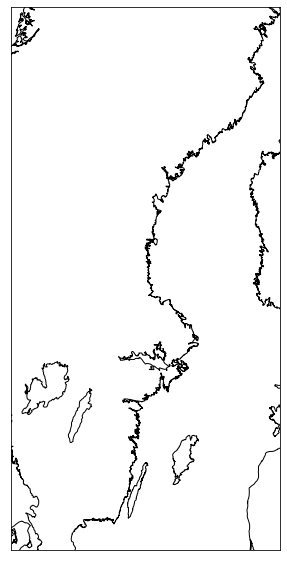

In [125]:
# Plot the interpolated values. 
# We will use the “basemap” module to plot the geographic data.
xintrp, yintrp = np.meshgrid(grid_lon, grid_lat)
fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(llcrnrlon=lons.min()-0.1,llcrnrlat=lats.min()-0.1,urcrnrlon=lons.max()+0.1,urcrnrlat=lats.max()+0.1, projection='merc', resolution='h',area_thresh=1000.,ax=ax)

# 2D meshgrid using the grid points.
# Basemap object “m” with the Mercator projection. 
# The constraints of the basemap object can be manually defined instead of the minimum and maximum of the latitude and longitude values as used.

# Draw coastlines on the map
# Convert the coordinates into the map scales
ln,lt=m(lons,lats)
m.drawcoastlines()
x,y=m(xintrp, yintrp) 
cs=ax.contourf(x, y, z1, np.linspace(0, 4500, ncols, np.float64,0 ),extend='both',cmap='rainbow') #plot the data on the map.
# linspace(start, stop, num, endpoint, retstep, dtype, axis)
cbar=m.colorbar(cs,location='right',pad="50%") #plot the colorbar on the map

# draw parallels.
parallels = np.arange(40,80,0.5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=14, linewidth=0.0) #Draw the latitude labels on the map
 
# draw meridians
meridians = np.arange(5,30,0.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=14, linewidth=0.0)